In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('input/train.csv', parse_dates=['DateTime'])
test = pd.read_csv('input/test.csv',  parse_dates=['DateTime'])

In [3]:
train.shape

(26729, 10)

In [4]:
train.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [5]:
train.describe()
#Need to fill OutcomeSubtype, SexUpon(or maybe drop that row..), ageuponOutcome(average?)
#Age, date are continuous/datetime, all others are categorical.
train.OutcomeSubtype = train.OutcomeSubtype.fillna('None')
train.SexuponOutcome = train.SexuponOutcome.fillna('Unknown')

In [6]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

## Outcome types and subtypes

Majority of outcomes were adoptions or transfers. Most of the subtypes seem to occur for only one or two outcome types. For example, suffering and aggression only appear as subtypes when the outcome type is euthanaisa.

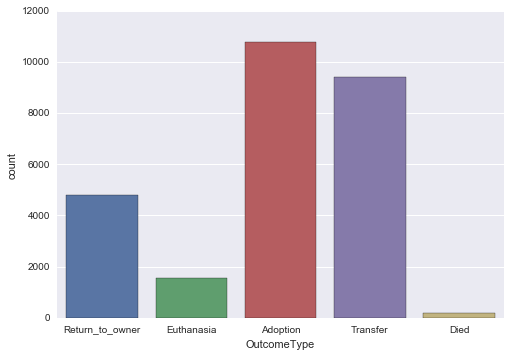

In [7]:
sns.countplot(train.OutcomeType)

In [110]:
train.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

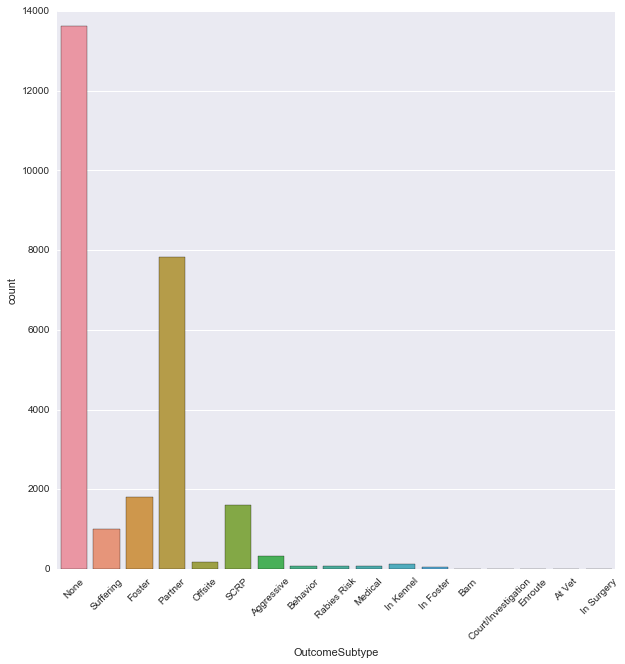

In [8]:
plt.figure(figsize=(10,10))
subOutcome = sns.countplot(train.OutcomeSubtype)
_ =plt.setp(subOutcome.get_xticklabels(), rotation=45)

In [9]:
print('OutcomeSubtypes for adoptions and transfers:')
print(train[(train.OutcomeType == 'Adoption') | (train.OutcomeType == "Transfer")].OutcomeSubtype.value_counts())

OutcomeSubtypes for adoptions and transfers:
None       8809
Partner    7816
Foster     1800
SCRP       1599
Offsite     165
Barn          2
Name: OutcomeSubtype, dtype: int64


In [10]:
print('Outcome Subtypes for euthanasia:')
print(train[(train.OutcomeType == 'Euthanasia')].OutcomeSubtype.value_counts())

Outcome Subtypes for euthanasia:
Suffering              1002
Aggressive              320
Behavior                 86
Rabies Risk              74
Medical                  66
Court/Investigation       6
None                      1
Name: OutcomeSubtype, dtype: int64


In [11]:
print('Outcome subtypes for return to owner:')
print(train[(train.OutcomeType == 'Return_to_owner')].OutcomeSubtype.value_counts())

Outcome subtypes for return to owner:
None    4786
Name: OutcomeSubtype, dtype: int64


In [12]:
print('Outcome subtypes for died:')
print(train[(train.OutcomeType == 'Died')].OutcomeSubtype.value_counts())

Outcome subtypes for died:
In Kennel     114
In Foster      52
None           16
Enroute         8
At Vet          4
In Surgery      3
Name: OutcomeSubtype, dtype: int64


## Cats vs. Dogs

More dogs than cats in the sample. Dog seem more likely to be adopted or returned to their owners, while cats are more likely to be transferred. Cats are mostly euthanized because of suffering, while dogs are put down for agression/behavioral issues as well as suffering.

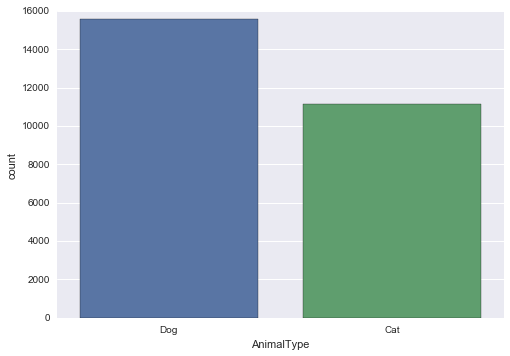

In [13]:
sns.countplot(train.AnimalType)

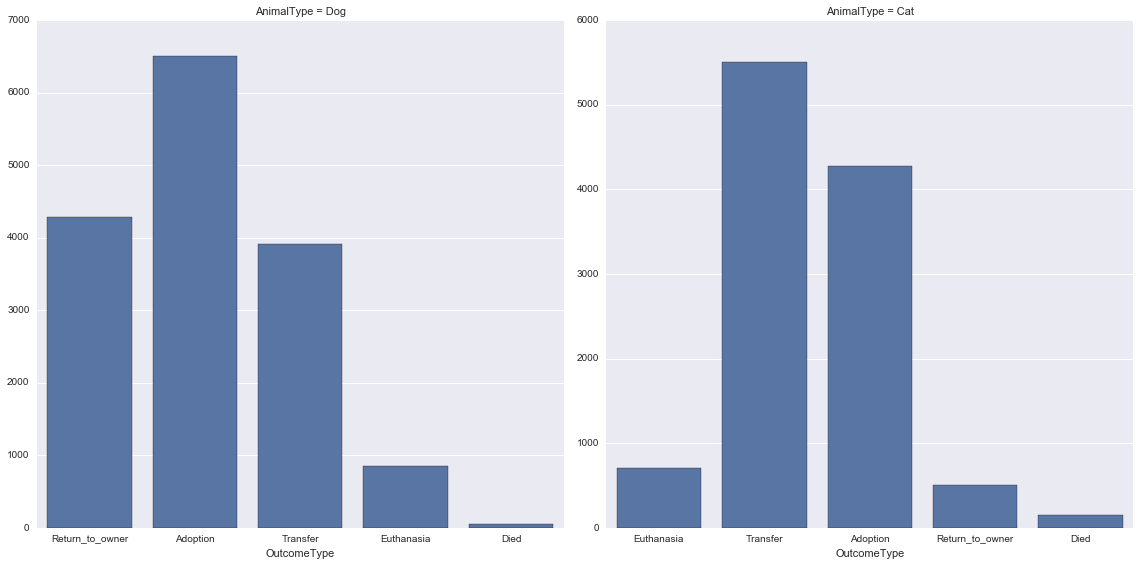

In [14]:
g = sns.FacetGrid(train, col="AnimalType", size=8, sharey=False, sharex=False)
g.map(sns.countplot, "OutcomeType")

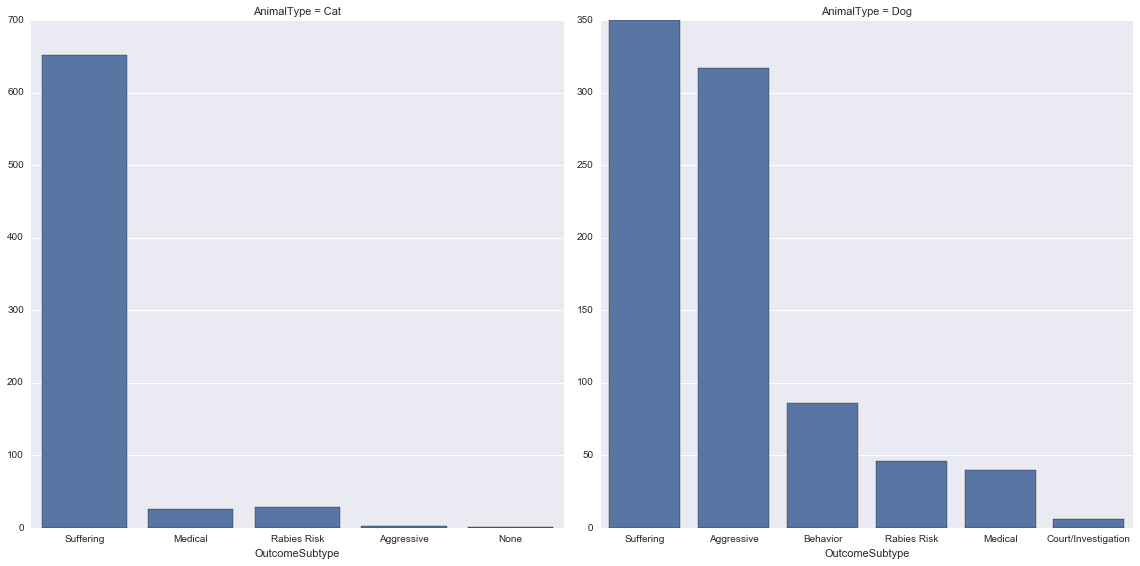

In [15]:
euthanized = train[train.OutcomeType == 'Euthanasia']
g = sns.FacetGrid(euthanized, col="AnimalType", size=8, sharey=False, sharex=False)
g.map(sns.countplot, "OutcomeSubtype")

## Sex

The majority of animals are spayed and neutered, and they have a better chance at adoption than intact animals.

In [16]:
train.SexuponOutcome.unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown'], dtype=object)

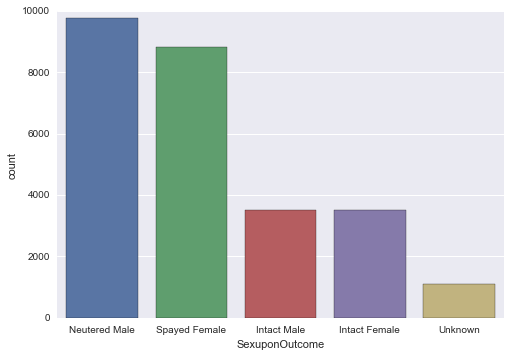

In [17]:
sns.countplot(data=train, x='SexuponOutcome')

In [18]:
plotBy('OutcomeType', 'SexuponOutcome')

NameError: name 'plotBy' is not defined

## Age

Most animals are 0-5 years old. Age doesn't seem to be related to outcome.

In [ ]:
train.AgeuponOutcome.describe()

In [ ]:
train.AgeuponOutcome.unique()

In [ ]:
import re

def convertToYears(age):
    if age == 999:
        return age
    
    num = int(re.search('\d+', age).group())
    unit = re.search('[A-Za-z]+', age).group()
    
    if 'year' in unit:
        return num
    if 'week' in unit:
        return num/52
    if 'month' in unit:
        return num/12
    if 'day' in unit:
        return num/365
    
    return num


In [ ]:
train.AgeuponOutcome = train.AgeuponOutcome.fillna(999)
train.AgeuponOutcome.unique()
train['ageInYears'] = train.AgeuponOutcome.apply(convertToYears)
train[['ageInYears', 'AgeuponOutcome']].tail()

In [ ]:
wo_99 = train[train.ageInYears < 999]
sns.distplot(wo_99.ageInYears)

In [ ]:
sns.stripplot(x='OutcomeType', y='ageInYears', data=wo_99, jitter=True)

In [ ]:
plt.figure(figsize=(10,10))
g = sns.stripplot(x='OutcomeSubtype', y='ageInYears', data=wo_99, jitter=True)
plt.xticks(rotation=45)

In [ ]:
g = sns.FacetGrid(wo_99, col="AnimalType", size=8)
g.map(sns.distplot, "ageInYears")

## Breed

In [41]:
dogs = train[train.AnimalType == "Dog"]
cats = train[train.AnimalType == "Cat"]
print('{} unique dog breeds'.format(dogs.Breed.unique().shape[0]))
print('{} unique cat breeds'.format(cats.Breed.unique().shape[0]))

1320 unique dog breeds
60 unique cat breeds


#### Dogs

In [ ]:
#Lots of pit bulls. Would a program focused on pit bulls be a good strategy?
dogs.Breed.value_counts()

In [ ]:
mixMask = ['Mix' in breed or '/' in breed for breed in dogs.Breed]

In [ ]:
mixes = dogs[mixMask]

In [ ]:
print(dogs.shape)
print(notMixes.shape)
print(mixes.shape)

In [ ]:
print(notMixes.Breed)

In [ ]:
notMix = [not mix for mix in mixMask]
notMixes = dogs[notMix]

More mixed breed animals seem to be adopted than returned to their owners, while the opposite is true for those not classified as a mixed breed. However, the small sample size of non-mixes makes this inconclusive.

In [ ]:
plt.figure(figsize=(10,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(mixes.OutcomeType, ax=ax1)
sns.countplot(notMixes.OutcomeType, ax=ax2)
ax1.set_title('Mixes')
ax2.set_title('Not Mixes')

A lot more we could do here with parsing breed.

In [ ]:
topDogBreedNames = dogs.Breed.value_counts().head(10).index
topDogBreedsMask = [breed in list(topDogBreedNames) for breed in dogs.Breed]
topDogBreeds= dogs[topDogBreedsMask]
groupedDogBrees = topDogBreeds.groupby('Breed')

In [ ]:
for breed, _ in groupedDogBrees.groups.items():
    sns.countplot(topDogBreeds[topDogBreeds.Breed == breed].OutcomeType)
    plt.title(breed)
    plt.show()

Pit bull mixes are euthanized largely because of agression, while as shown above, dogs in general are more likely to be euthanized because of aggression.

In [ ]:
sns.countplot(topDogBreeds[(topDogBreeds.Breed == 'Pit Bull Mix') & (topDogBreeds.OutcomeType == "Euthanasia")].OutcomeSubtype)

In [ ]:
slashMask = ["/" in breed for breed in train.Breed]

In [ ]:
train[slashMask].Breed

#### Cats

The majority of cats are short hair mixes. Unfortunately, they are adopted at a lower rate than the other prevalent breeds.

In [40]:
cats.Breed.value_counts()

NameError: name 'cats' is not defined

In [ ]:
topCatBreedNames = cats.Breed.value_counts().head(5).index
topCatBreedMask = [breed in list(topCatBreedNames) for breed in cats.Breed]
topCatBreeds= cats[topCatBreedMask]

In [ ]:
g = sns.FacetGrid(topCatBreeds, col="Breed", size=8, col_wrap=2, sharey=False, sharex=False)
g.map(sns.countplot, 'OutcomeType')

Grouping by breed to investigate further. It basically confirms what the graphs above.

In [ ]:
groupedCats = cats.groupby('Breed').apply(lambda x: x.OutcomeType.value_counts()).unstack(level=-1).fillna(0)

In [ ]:
groupedCats.index.name = None

In [ ]:
for col in groupedCats.columns:
    groupedCats[col+"_rate"] = groupedCats[col]/groupedCats.sum(1)

In [ ]:
groupedCats.sort_values('Euthanasia_rate', ascending=False)

#### Color


In [25]:
train.Color.value_counts()

Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Blue                            450
Brown Brindle/White             450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White            

In [101]:
def outcomeByColor(df):
    grouped = df.groupby('Color').apply(lambda x: x.OutcomeType.value_counts()).unstack(level=-1).fillna(0)
    grouped.index.name = 'Color'
    grouped['count'] = grouped.sum(axis=1)
    groupedMinusCount = [column for column in grouped.columns if column != "count"]  
    for col in groupedMinusCount:
        grouped[col+"_rate"] = grouped[col]/grouped[groupedMinusCount].sum(1)
    return grouped.reset_index().sort_values('count', ascending=False)

In [102]:
allColors = outcomeByColor(train)

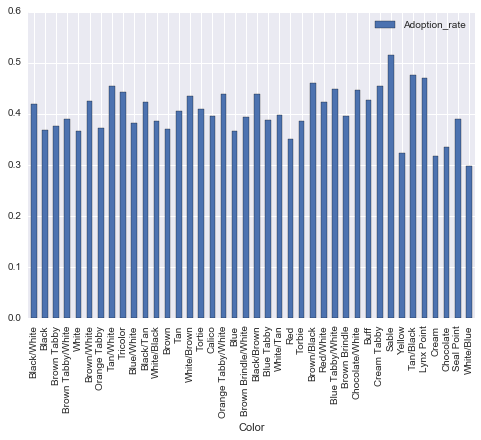

In [103]:
allColors.sort_values('count', ascending=False).head(40).plot.bar(x='Color', y='Adoption_rate')

#### Cats

In [104]:
catsColors = outcomeByColor(cats)

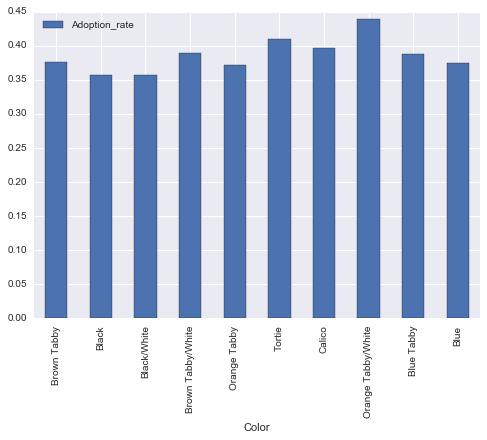

In [106]:
catsColors.head(10).plot.bar(x='Color', y='Adoption_rate')

#### Dogs

In [108]:
dogsColors = outcomeByColor(dogs)

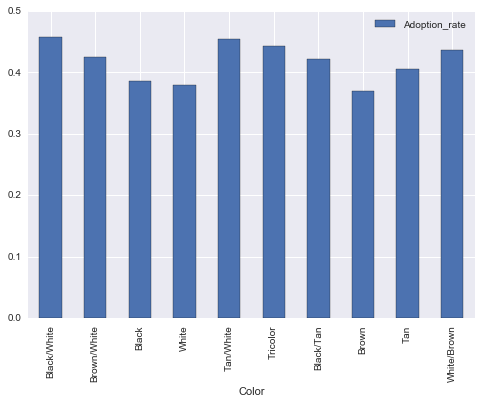

In [109]:
dogsColors.head(10).plot.bar(x='Color', y='Adoption_rate')